<a href="https://colab.research.google.com/github/chotika-boon/DADS7203_assignment1/blob/main/DADS7203_assignment1_Model2_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Prepare VM

In [ ]:
import torch
torch.cuda.is_available()

True

# 2. Install Library

In [ ]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.8/6.8 MB 56.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.8/199.8 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 111.8 MB/s eta 0:00:00


In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!pip install pythainlp

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 62.9 MB/s eta 0:00:00


In [ ]:
import numpy as np
import pandas as pd
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
import transformers
from transformers import AutoModel, BertTokenizerFast

# specify GPU
device = torch.device("cuda")

In [ ]:
from pythainlp.corpus.common import thai_stopwords
thai_stopwords = list(thai_stopwords())

# 3. Load Data

In [ ]:
df = pd.read_csv("/content/gdrive/MyDrive/Lab_2/Lab_2/dataset/tcas61-2.csv")
df.sample(5)

,label,text
55,0,เคลียดนานมาก เข้ารหัสไม่ได้สักที 😭😭
93,1,ติดแล้ววววววววววขอบคุณมากนะคะ
59,0,เข้ามาแล้วก็เครียด ทั้งเครียดทั้งกดดันทั้งกังว...
97,0,ตอนนี้รอประกาศผลจนฟุ่งซานล่ะ นานเกิ้นแถมไม่รู้...
36,1,ได้เป็นลูกช้างแล้วโว้ยยยย ติดแล้ว ดีใจมาก 💕💕💕💕💕😍😍


In [ ]:
df.shape

(124, 2)

<Axes: >

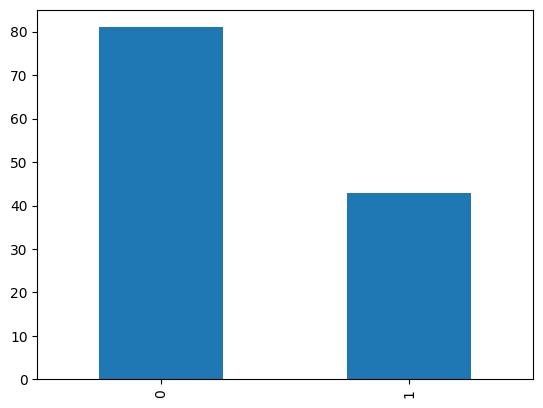

In [ ]:
df['label'].value_counts().plot.bar()

# 4. Train-Test Split

In [ ]:
train_text, test_text, train_labels, test_labels = train_test_split(df['text'], df['label'], 
                                                                    random_state=101, 
                                                                    test_size=0.3, 
                                                                    stratify=df['label'])

print('train_text shape =',train_text.shape)
print('test_text shape =',test_text.shape)

# we will use temp_text and temp_labels to create validation and test set
#val_text, test_text, val_labels, test_labels = train_test_split(temp_text, temp_labels, 
                                                                #random_state=101, 
                                                                #test_size=0.5, 
                                                                #stratify=temp_labels)

#print('val_text shape =',val_text.shape)
#print('test_text shape =',test_text.shape)

train_text shape = (86,)
test_text shape = (38,)


In [ ]:
from transformers import AutoTokenizer, AutoModel
from google.colab import widgets

In [ ]:
pretrained = "Geotrend/bert-base-th-cased"#@param ["monsoon-nlp/bert-base-thai", "bert-base-multilingual-uncased", "Geotrend/bert-base-th-cased"] 

In [ ]:
name = pretrained

In [ ]:
tokenizer = AutoTokenizer.from_pretrained(name)
bert = AutoModel.from_pretrained(name)

Some weights of the model checkpoint at Geotrend/bert-base-th-cased were not used when initializing BertModel: ['cls.predictions.decoder.bias', 'cls.predictions.decoder.weight', 'cls.predictions.transform.dense.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.transform.dense.bias', 'cls.predictions.transform.LayerNorm.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertModel were not initialized from the model checkpoint at Geotrend/bert-base-th-cased and are newly initialized: ['bert.pooler.dense.bias', 'bert.pooler.de

<Axes: >

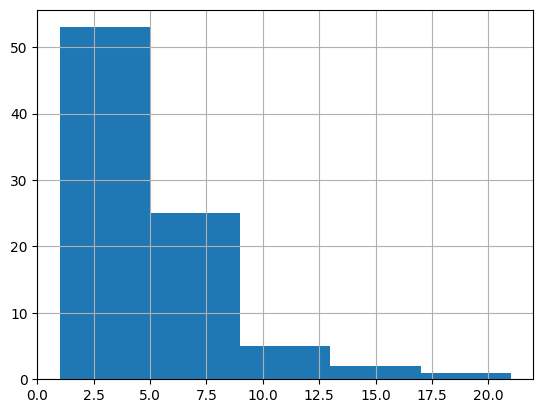

In [ ]:
# get length of all the messages in the train set
seq_len = [len(i.split()) for i in train_text]

pd.Series(seq_len).hist(bins = 5)

In [ ]:
max_seq_len = 8

In [ ]:
# tokenize and encode sequences in the training set
# Parameters max_length = The maximum length (in number of tokens) for the inputs to the transformer model

# tokenize and encode sequences in the train set
tokens_train = tokenizer.batch_encode_plus(
    train_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

# tokenize and encode sequences in the validation set
#tokens_val = tokenizer.batch_encode_plus(
    #val_text.tolist(),
    #max_length = max_seq_len,
    #pad_to_max_length=True,
    #truncation=True,
    #return_token_type_ids=False
#)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    test_text.tolist(),
    max_length = max_seq_len,
    pad_to_max_length=True,
    truncation=True,
    return_token_type_ids=False
)

/usr/local/lib/python3.9/dist-packages/transformers/tokenization_utils_base.py:2346: FutureWarning: The `pad_to_max_length` argument is deprecated and will be removed in a future version, use `padding=True` or `padding='longest'` to pad to the longest sequence in the batch, or use `padding='max_length'` to pad to a max length. In this case, you can give a specific length with `max_length` (e.g. `max_length=45`) or leave max_length to None to pad to the maximal input size of the model (e.g. 512 for Bert).
  warnings.warn(


# Convert Integer Sequences to Tensors

In [ ]:
#1.key = ids
#2.query = attention_mask
#3.value = label (0,1)
# for train set
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(train_labels.tolist())

# for validation set
#val_seq = torch.tensor(tokens_val['input_ids'])
#val_mask = torch.tensor(tokens_val['attention_mask'])
#val_y = torch.tensor(val_labels.tolist())

# for test set
test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(test_labels.tolist())

# **Create DataLoaders**

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)

# wrap tensors
#val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
#val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
#val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)

In [ ]:
# unfreeze all the parameters
for param in bert.parameters():
    param.requires_grad = False

# **Define Model Architecture**

In [ ]:
class BERT_Arch(nn.Module):
# Applies a linear transformation to the incoming data:
# Parameters in_features – size of each input sample and out_features – size of each output sample

    def __init__(self, bert):
      
      super(BERT_Arch, self).__init__()

      self.bert = bert 
      
      # dropout layer
      self.dropout = nn.Dropout(0.1)
      
      # relu activation function
      self.relu =  nn.ReLU()

      # dense layer 1
      self.fc1 = nn.Linear(768,512)    
      
      # dense layer 2 (Output layer)
      self.fc2 = nn.Linear(512,2)

      #softmax activation function
      self.softmax = nn.LogSoftmax(dim=1)

    #define the forward pass
    def forward(self, sent_id, mask):

      #pass the inputs to the model  
      _, cls_hs = self.bert(sent_id, attention_mask=mask,return_dict=False)
      
      x = self.fc1(cls_hs)

      x = self.relu(x)

      x = self.dropout(x)

      # output layer
      x = self.fc2(x)
      
      # apply softmax activation
      x = self.softmax(x)

      return x

In [ ]:
# pass the pre-trained BERT to our define architecture
model = BERT_Arch(bert)

# push the model to GPU
model = model.to(device)

In [ ]:
# optimizer from hugging face transformers
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-2)

/usr/local/lib/python3.9/dist-packages/transformers/optimization.py:391: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


# **Find Class Weights**

In [ ]:
from sklearn.utils.class_weight import compute_class_weight

#compute the class weights for unbalanced datasets
class_wts = compute_class_weight('balanced', classes= np.unique(train_labels), y= train_labels)

print(class_wts)

[0.76785714 1.43333333]


In [ ]:
# convert class weights to tensor
weights= torch.tensor(class_wts,dtype=torch.float)
weights = weights.to(device)

# loss function
cross_entropy  = nn.NLLLoss(weight=weights) 

# number of training epochs
epochs = 100

# **Fine Tune Model**

In [ ]:
# function to train the model
def train():
  
  model.train()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save model predictions
  total_preds=[]
  
  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # progress update after every 50 batches.
    if step % 50 == 0 and not step == 0:
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [r.to(device) for r in batch]
 
    sent_id, mask, labels = batch
 
    # clear previously calculated gradients 
    model.zero_grad()        

    # get model predictions for the current batch
    preds = model(sent_id, mask)

    # compute the loss between actual and predicted values
    loss = cross_entropy(preds, labels)

    # add on to the total loss
    total_loss = total_loss + loss.item()

    # backward pass to calculate the gradients
    loss.backward()

    # clip the the gradients to 1.0. It helps in preventing the exploding gradient problem
    torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)

    # update parameters
    optimizer.step()

    # model predictions are stored on GPU. So, push it to CPU
    preds=preds.detach().cpu().numpy()

    # append the model predictions
    total_preds.append(preds)

  # compute the training loss of the epoch
  avg_loss = total_loss / len(train_dataloader)
  
  # predictions are in the form of (no. of batches, size of batch, no. of classes).
  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  #returns the loss and predictions
  return avg_loss, total_preds

In [ ]:
# function for evaluating the model
def evaluate():
  
  print("\nEvaluating...")
  
  # deactivate dropout layers
  model.eval()

  total_loss, total_accuracy = 0, 0
  
  # empty list to save the model predictions
  total_preds = []

  # iterate over batches
  for step,batch in enumerate(train_dataloader):
    
    # Progress update every 50 batches.
    if step % 50 == 0 and not step == 0:
      
      # Calculate elapsed time in minutes.
      elapsed = format_time(time.time() - t0)
            
      # Report progress.
      print('  Batch {:>5,}  of  {:>5,}.'.format(step, len(train_dataloader)))

    # push the batch to gpu
    batch = [t.to(device) for t in batch]

    sent_id, mask, labels = batch

    # deactivate autograd
    with torch.no_grad():
      
      # model predictions
      preds = model(sent_id, mask)

      # compute the validation loss between actual and predicted values
      loss = cross_entropy(preds,labels)

      total_loss = total_loss + loss.item()

      preds = preds.detach().cpu().numpy()

      total_preds.append(preds)

  # compute the validation loss of the epoch
  avg_loss = total_loss / len(train_dataloader) 

  # reshape the predictions in form of (number of samples, no. of classes)
  total_preds  = np.concatenate(total_preds, axis=0)

  return avg_loss, total_preds

# **Start Model Training**

In [ ]:
# set initial loss to infinite
best_valid_loss = float('inf')

# empty lists to store training and validation loss of each epoch
train_losses=[]
valid_losses=[]

#for each epoch
for epoch in range(epochs):
     
    print('\n Epoch {:} / {:}'.format(epoch + 1, epochs))
    
    #train model
    train_loss, _ = train()

    
    #evaluate model
    valid_loss, _ = evaluate()
    
    #save the best model
    if valid_loss < best_valid_loss:
        best_valid_loss = valid_loss
        torch.save(model.state_dict(), 'saved_weights.pt')
    
    # append training and validation loss
    train_losses.append(train_loss)
    valid_losses.append(valid_loss)
    
    print(f'\nTraining Loss: {train_loss:.3f}')
    print(f'Validation Loss: {valid_loss:.3f}')


 Epoch 1 / 100

Evaluating...

Training Loss: 1.274
Validation Loss: 0.767

 Epoch 2 / 100

Evaluating...

Training Loss: 1.265
Validation Loss: 0.624

 Epoch 3 / 100

Evaluating...

Training Loss: 0.977
Validation Loss: 1.146

 Epoch 4 / 100

Evaluating...

Training Loss: 0.698
Validation Loss: 1.010

 Epoch 5 / 100

Evaluating...

Training Loss: 0.832
Validation Loss: 0.500

 Epoch 6 / 100

Evaluating...

Training Loss: 0.580
Validation Loss: 0.504

 Epoch 7 / 100

Evaluating...

Training Loss: 0.533
Validation Loss: 0.478

 Epoch 8 / 100

Evaluating...

Training Loss: 0.479
Validation Loss: 0.585

 Epoch 9 / 100

Evaluating...

Training Loss: 0.599
Validation Loss: 0.596

 Epoch 10 / 100

Evaluating...

Training Loss: 0.836
Validation Loss: 0.367

 Epoch 11 / 100

Evaluating...

Training Loss: 0.538
Validation Loss: 0.375

 Epoch 12 / 100

Evaluating...

Training Loss: 0.571
Validation Loss: 0.349

 Epoch 13 / 100

Evaluating...

Training Loss: 0.484
Validation Loss: 0.337

 Epoch 

#**Load Saved Model**

In [ ]:
#load weights of best model
path = 'saved_weights.pt'
model.load_state_dict(torch.load(path))

<All keys matched successfully>

# **Get Predictions for Test Data**

In [ ]:
# get predictions for train data
with torch.no_grad():
  preds = model(train_seq.to(device), train_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [ ]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(train_y, preds))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        56
           1       1.00      1.00      1.00        30

    accuracy                           1.00        86
   macro avg       1.00      1.00      1.00        86
weighted avg       1.00      1.00      1.00        86



In [ ]:
# confusion matrix
pd.crosstab(train_y, preds)

col_0,0,1
row_0,,
0,56,0
1,0,30


In [ ]:
# get predictions for test data
with torch.no_grad():
  preds = model(test_seq.to(device), test_mask.to(device))
  preds = preds.detach().cpu().numpy()

In [ ]:
# model's performance
preds = np.argmax(preds, axis = 1)
print(classification_report(test_y, preds))

              precision    recall  f1-score   support

           0       0.90      0.76      0.83        25
           1       0.65      0.85      0.73        13

    accuracy                           0.79        38
   macro avg       0.78      0.80      0.78        38
weighted avg       0.82      0.79      0.79        38

